# Student Performance: Preprocessing

In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
data_path = "C:\\Users\\XZ374JM\\OneDrive - EY\\Desktop\\AI Academy\\Maci-Giacobbe-Buda-Meziane\\esercizio 21-08\\datasets\\student_performance\\Student_performance_data _.csv"

df = pd.read_csv(data_path)

In [39]:
print("The shape of the datset is:  ", df.shape)
 
# check for null values
print()
print('Null values:')
print(df.isnull().sum())
 
# check for duplicate rows
print()
print('Duplicated rows:')
print(df.duplicated().sum())
 

The shape of the datset is:   (2392, 15)

Null values:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

Duplicated rows:
0


In [40]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [41]:
print(df.columns)

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')


In [42]:
columns_to_drop = ['StudentID']

cat_features = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering',
       'GradeClass']

num_features = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']

# drop unused columns
df.drop(columns=columns_to_drop, inplace=True)

# encode categorical features
df = pd.get_dummies(df, columns=cat_features, drop_first=True)

# scale numerical features
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

In [43]:
df.head()

,Age,StudyTimeWeekly,Absences,GPA,Gender_1,Ethnicity_1,Ethnicity_2,Ethnicity_3,ParentalEducation_1,ParentalEducation_2,...,ParentalSupport_3,ParentalSupport_4,Extracurricular_1,Sports_1,Music_1,Volunteering_1,GradeClass_1.0,GradeClass_2.0,GradeClass_3.0,GradeClass_4.0
0,0.472919,1.780336,-0.890822,1.118086,True,False,False,False,False,True,...,False,False,False,False,True,False,False,True,False,False
1,1.362944,0.997376,-1.717694,1.242374,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2,-1.307132,-0.984045,1.353542,-1.960277,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0.472919,0.045445,-0.063951,0.161790,True,False,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False
4,0.472919,-0.902311,0.290422,-0.675573,True,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True


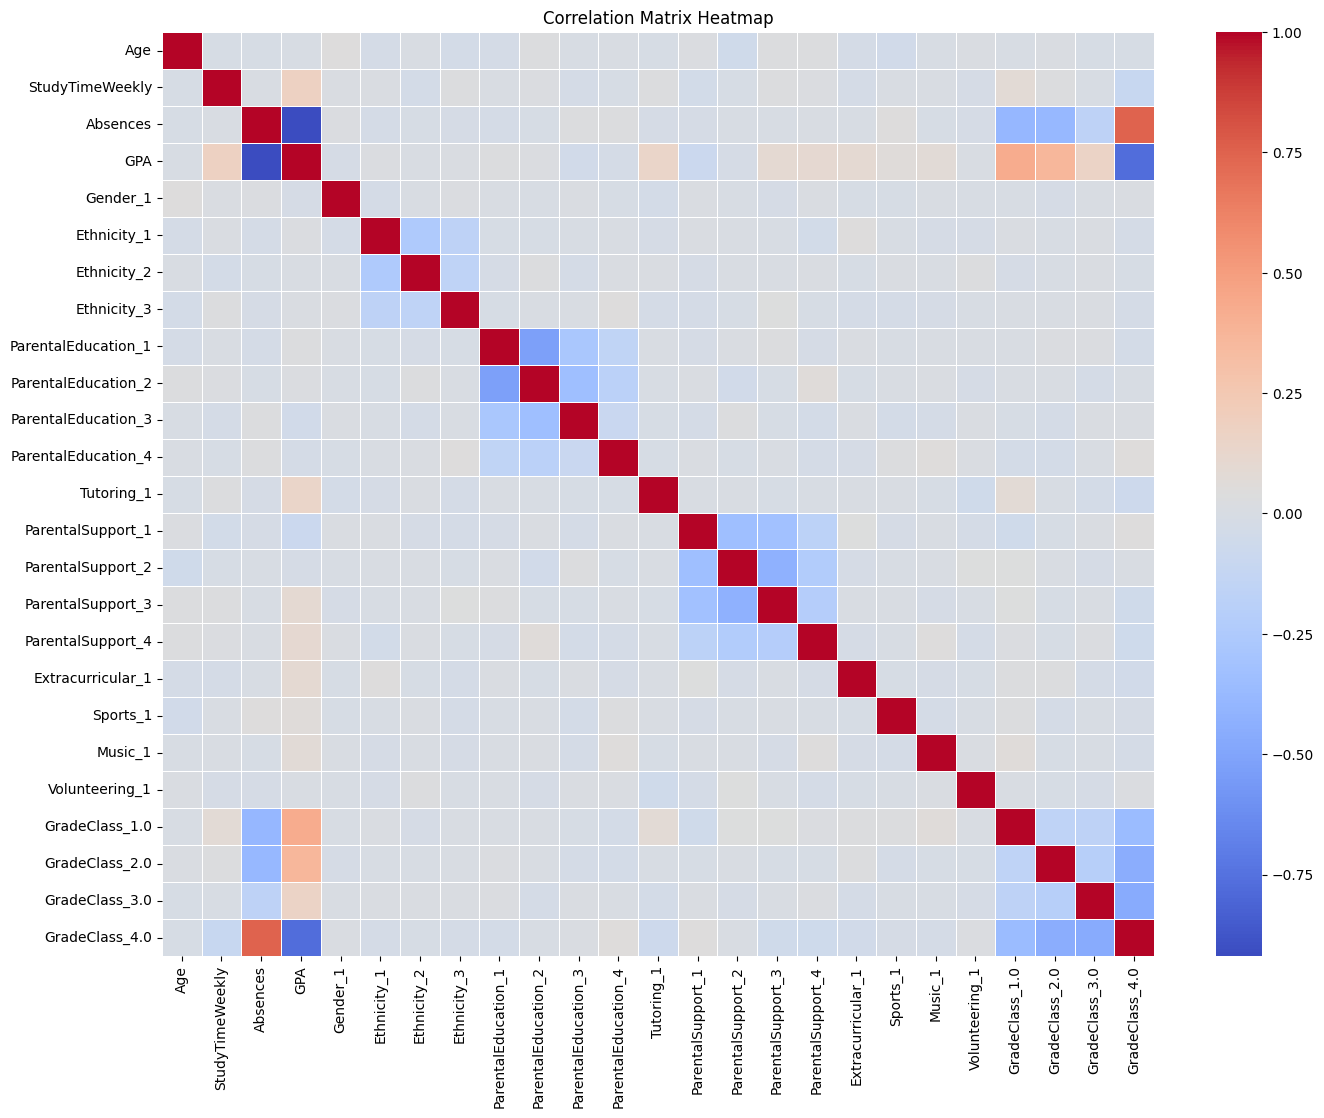

In [ ]:
# correlation matrix
corr = df.corr()

# visualiza correlation
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=False, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()